In [38]:
import pandas as pd
dataset = 'motionsense'
# experiment_name = 'convtae_kuhar_old'
data = pd.read_csv(f'experiments/motionsense/simclr_motion_encoder_1T_100/data.csv')
data.loc[data['score'] < 0,'score'] = 0

In [39]:
data

,Unnamed: 0,score,randomforest-100-accuracy (mean),randomforest-100-accuracy (std),randomforest-100-f1-score macro (mean),randomforest-100-f1-score macro (std),randomforest-100-f1-score weighted (mean),randomforest-100-f1-score weighted (std),KNN-5-accuracy (mean),KNN-5-accuracy (std),...,node_ip,time_since_restore,iterations_since_restore,checkpoint_dir_name,config/min_delta,config/temperature,config/latent_dim,config/batch_size,config/transform_funcs,logdir
0,0,0.638571,0.638571,0.012363,0.634577,0.012496,0.634577,0.012496,0.576190,0.0,...,172.17.0.2,60.698808,1,NaN,0.814,1.1,353,231,"(11,)",0255dbbb
1,1,0.605000,0.605000,0.007711,0.604834,0.008003,0.604834,0.008003,0.552381,0.0,...,172.17.0.2,41.281839,1,NaN,0.031,1.4,128,317,"(11,)",6f22c440
2,2,0.729524,0.729524,0.007159,0.734998,0.007385,0.734998,0.007385,0.661905,0.0,...,172.17.0.2,64.419912,1,NaN,0.194,0.2,293,268,"(0,)",12378d7a
3,3,0.643095,0.643095,0.012208,0.639654,0.013313,0.639654,0.013313,0.607143,0.0,...,172.17.0.2,42.447395,1,NaN,0.102,1.9,140,301,"(3,)",30aed440
4,4,0.598571,0.598571,0.009536,0.599935,0.009247,0.599935,0.009247,0.566667,0.0,...,172.17.0.2,27.794493,1,NaN,0.290,1.7,41,255,"(9,)",65c708db
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,0.821190,0.821190,0.007929,0.823537,0.007749,0.823537,0.007749,0.721429,0.0,...,172.17.0.2,51.015665,1,NaN,0.001,0.1,156,211,"(1,)",0771789e
997,997,0.741190,0.741190,0.009286,0.748381,0.009021,0.748381,0.009021,0.666667,0.0,...,172.17.0.2,60.346292,1,NaN,0.013,0.1,139,202,"(11,)",9515d61c
998,998,0.807857,0.807857,0.007067,0.810927,0.006749,0.810927,0.006749,0.750000,0.0,...,172.17.0.2,58.701526,1,NaN,0.016,0.1,162,187,"(1,)",0e3e9887
999,999,0.613571,0.613571,0.012143,0.610551,0.012653,0.610551,0.012653,0.552381,0.0,...,172.17.0.2,48.099527,1,NaN,0.025,0.1,148,203,"(4,)",5e93f4d8


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [41]:
with open(f'TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
    score = yaml.load(f, Loader=yaml.FullLoader)
    score = score['score']
    print(score)

0.785952380952381


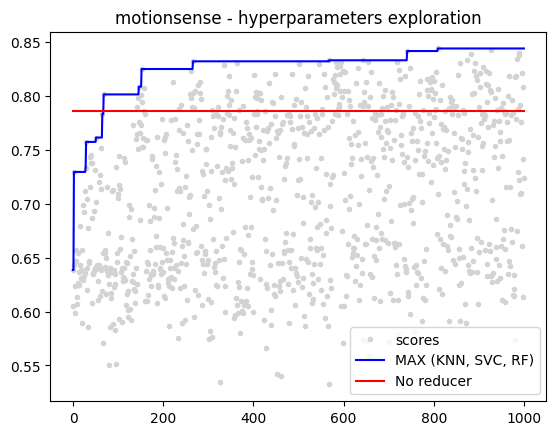

In [42]:
# Plot all data points
plt.title(f'{dataset} - hyperparameters exploration')
plt.plot(data['Unnamed: 0'], data['score'], '.', color='lightgray', label='scores')
plt.plot(data['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
plt.plot(data['Unnamed: 0'], [score]*len(data), color='red', label='No reducer')
plt.legend()

In [45]:

    

def get_perc(dataset,percentage,plot_per,indice_plot,transf):
    try:
        data = pd.read_csv(f'experiments/motionsense/simclr_motion_encoder_{transf}_{percentage}/data.csv')

       # data = pd.read_csv(f'../experiments/umap_{dataset}_p25/data.csv')
        data = data.loc[data['score'] > 0]
    except:
        data = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    if(plot_per):
        axs[indice_plot].set_title(f'Up to {percentage}% of orig. dim.')
        axs[indice_plot].plot(data['Unnamed: 0'], data['score'], '.', color='lightgray', label='scores')
        axs[indice_plot].plot(data['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
        axs[indice_plot].plot(data['Unnamed: 0'], [score]*len(data), color='red', label='No reducer')
        axs[indice_plot].legend(loc='lower center')
        axs[indice_plot].set_ylabel(f'Best accuracy on {dataset}_{transf}')
        axs[0].grid()
        
        
    
    

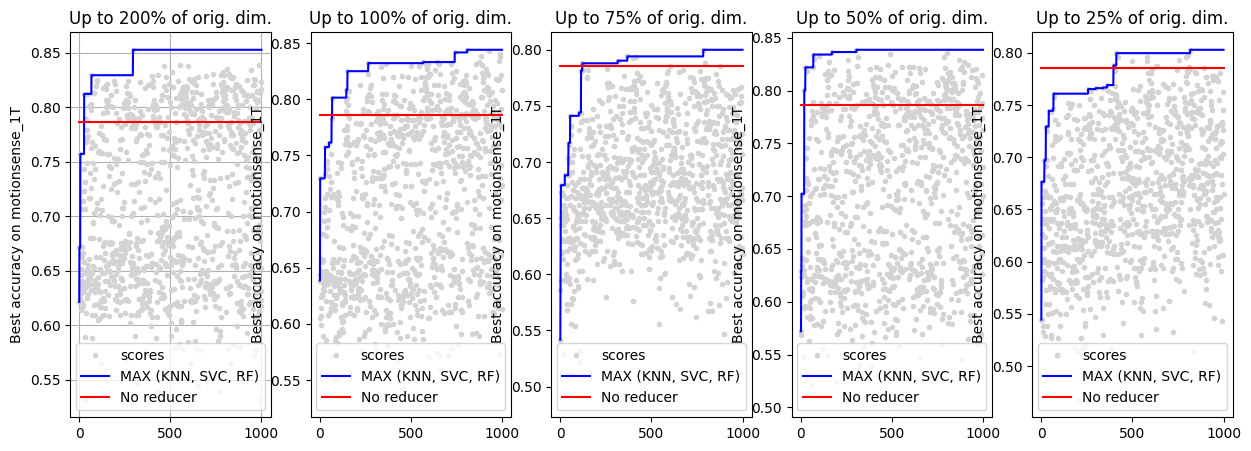

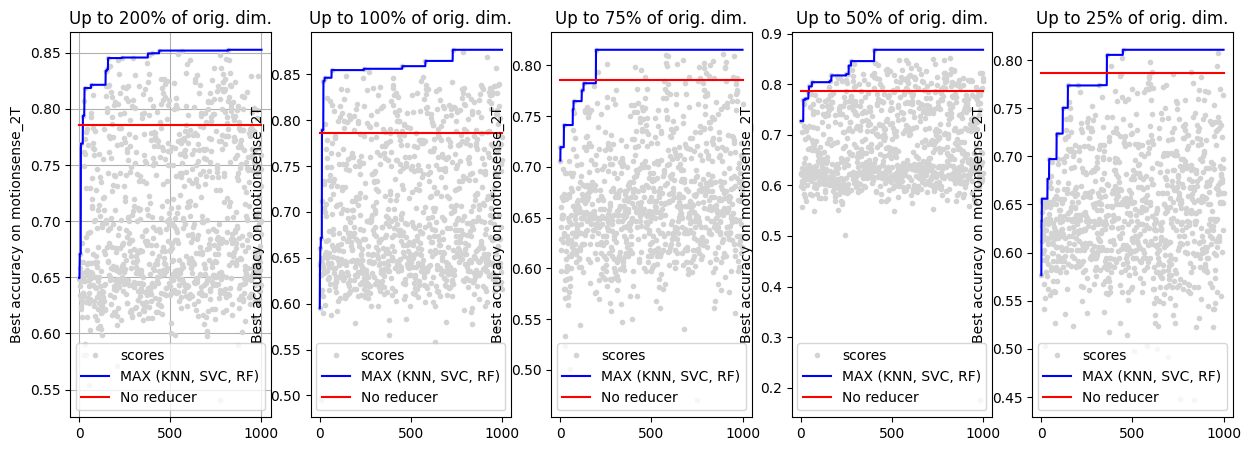

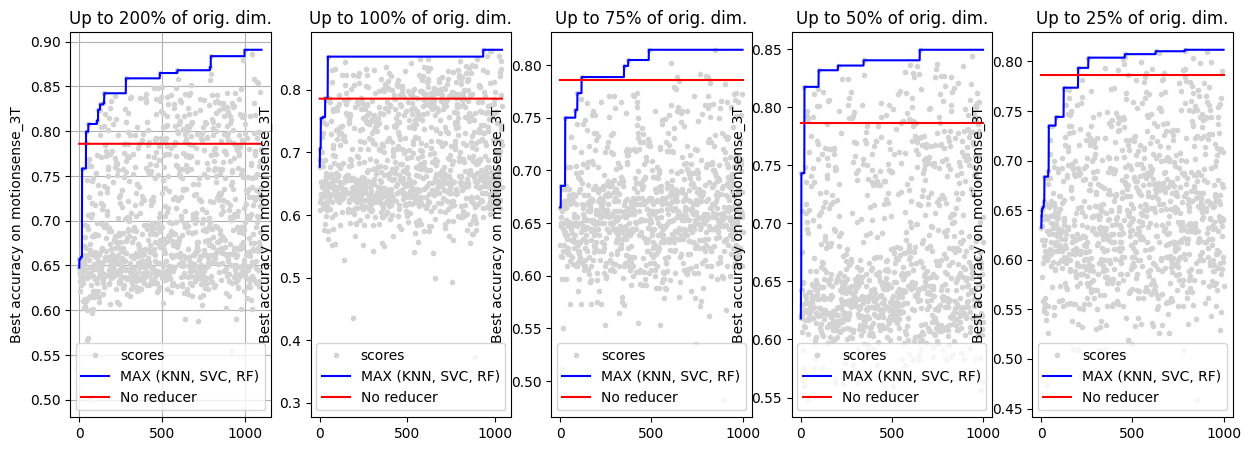

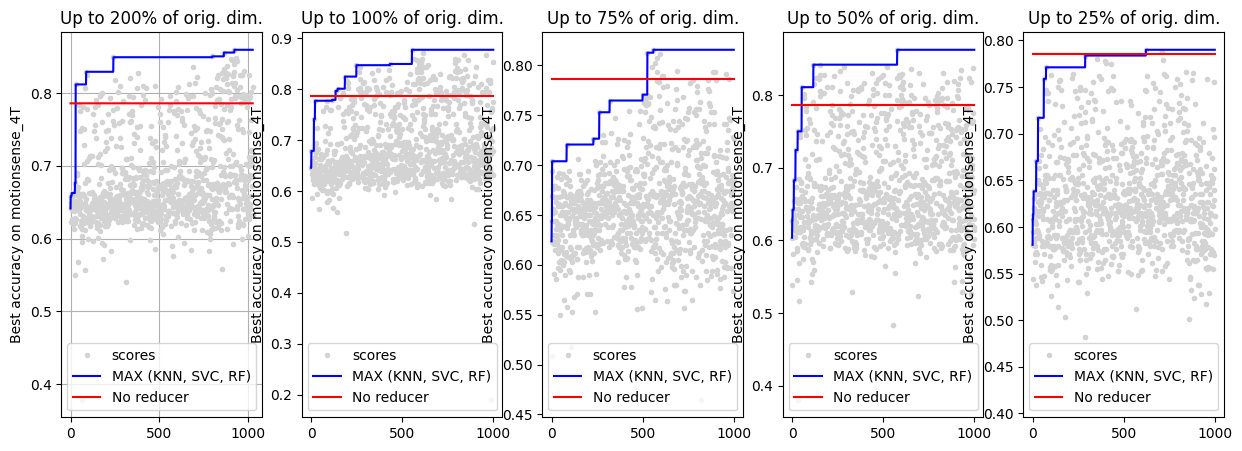

In [46]:
transformations=['1T','2T','3T','4T']
percentages=['200','100','75','50','25']
plot_per=True
for i, transf in enumerate(transformations):
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))

    # Subplots for each dataset
    for j, percentage in enumerate(percentages):
        get_perc(dataset,percentage,plot_per,j,transf)
        
    

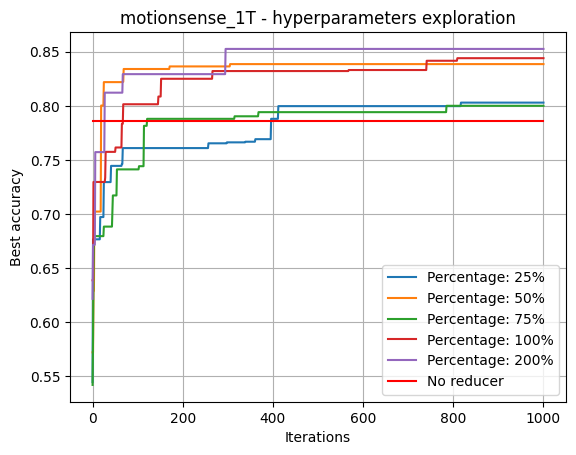

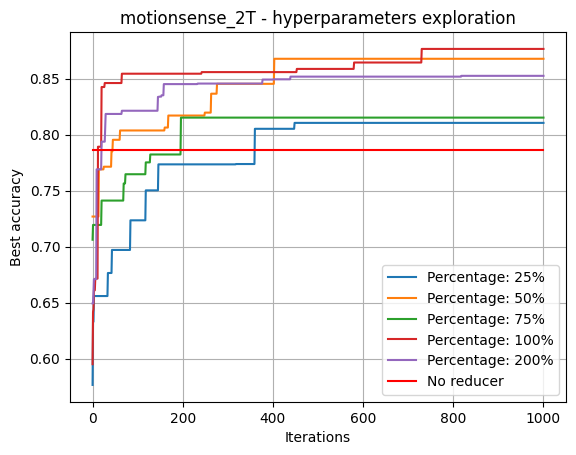

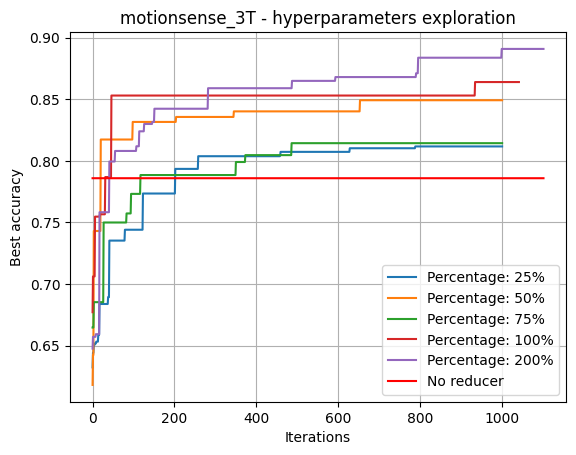

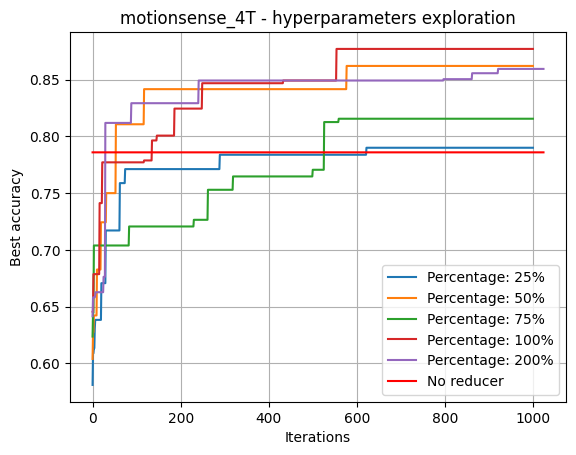

In [48]:
#datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
# datasets = ['kuhar', 'motionsense', 'realworld_thigh', 'realworld_waist']
transformations=['1T','2T','3T','4T']

colors = ['green', 'blue', 'orange', 'red', 'purple', 'brown']
percentages = [25, 50, 75, 100, 200]

for i, transformation in enumerate(transformations):
    best_scores = []
    for p in percentages:
        try:
            data = pd.read_csv(f'experiments/motionsense/simclr_motion_encoder_{transformation}_{p}/data.csv')

            data = data.loc[data['score'] > 0]
        except:
            data = pd.DataFrame({'Unnamed: 0': [], 'score': []})
        best_scores.append(data['score'].max())
        plt.plot(data['score'].cummax(), label=f'Percentage: {p}%')
    
    with open(f'TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        score_no_reducer = yaml.load(f, Loader=yaml.FullLoader)
        score_no_reducer = score_no_reducer['score']
        plt.plot(data['Unnamed: 0'], [score_no_reducer]*len(data['Unnamed: 0']), color='red', label='No reducer')
    plt.title(f'{dataset}_{transformation} - hyperparameters exploration')
    plt.ylabel('Best accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    plt.show()

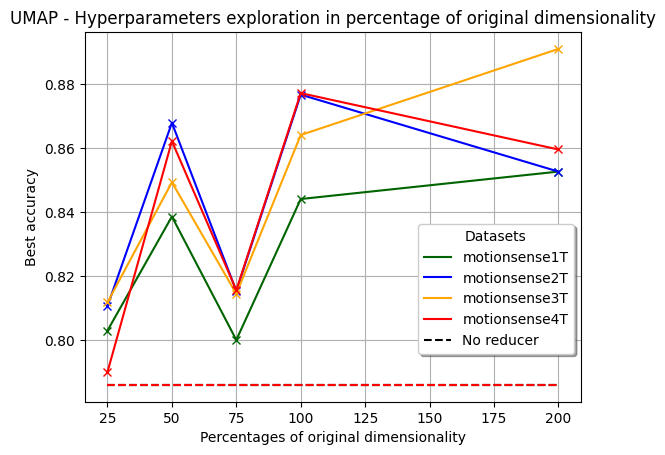

In [51]:
#datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
# datasets = ['kuhar', 'motionsense', 'realworld_thigh', 'realworld_waist']
colors = ['darkgreen', 'blue', 'orange', 'red', 'lightgreen', 'brown']
percentages = [25, 50, 75, 100, 200]
transformations=['1T','2T','3T','4T']
for i, transformation in enumerate(transformations):
    best_scores = []
    for p in percentages:
        try:
            data = pd.read_csv(f'experiments/motionsense/simclr_motion_encoder_{transformation}_{p}/data.csv')
            data = data.loc[data['score'] > 0]
            best_scores.append(data['score'].max())
        except:
            best_scores.append(0)
    plt.plot(percentages, best_scores, 'x', color=colors[i])
    plt.plot(percentages, best_scores, '-', label=f'{dataset}{transformation}', color=colors[i])
    
    with open(f'TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        score_no_reducer = yaml.load(f, Loader=yaml.FullLoader)
        score_no_reducer = score_no_reducer['score']
    plt.plot(percentages, [score_no_reducer]*len(percentages), '--', color=colors[i])
plt.plot(np.NaN, np.NaN, '--', color=[0, 0, 0], label='No reducer' )

plt.title(f'UMAP - Hyperparameters exploration in percentage of original dimensionality')
plt.ylabel('Best accuracy')
plt.xlabel('Percentages of original dimensionality')
plt.legend(bbox_to_anchor=(1.0, 0.5), fancybox=True, shadow=True, ncol=1, title='Datasets')
plt.grid()
plt.show()
    